<a href="https://colab.research.google.com/github/vjferro/Data-Science-com-Python/blob/main/An%C3%A1lise_de_s%C3%A9rie_temporal_Mercado_Financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de série temporal com dados do Mercado Financeiro**




> "Uma série temporal possui heteroscedasticidade quando sua variância condicional varia ao longo do tempo. Para avaliação de riscos de um ativo financeiro, frequentemente é utilizada a série de variaçãoes (diárias, semanais, mensais, etc) dos preços desse ativo." (PEDROSO,2015) 




*   Os dados em estudo nesse notebook são reais e públicos, e apresentam uma série histórica das cotações de preço das ações da empresa de capital aberto Magalu.
*   O formato do arquivo correspondente ao dataset é o Xls. 


*   As biblitecas utilizadas nesse estudo são: Pandas, Numpy, Seaborn, Matplotlib.pyplot  e plotly.graph_objects. 
*   O objetivo é a costrução gráfica da série temporal no intuito de possibilitar a avaliação da referida Ação do Mercado Brasileiro de Capitais

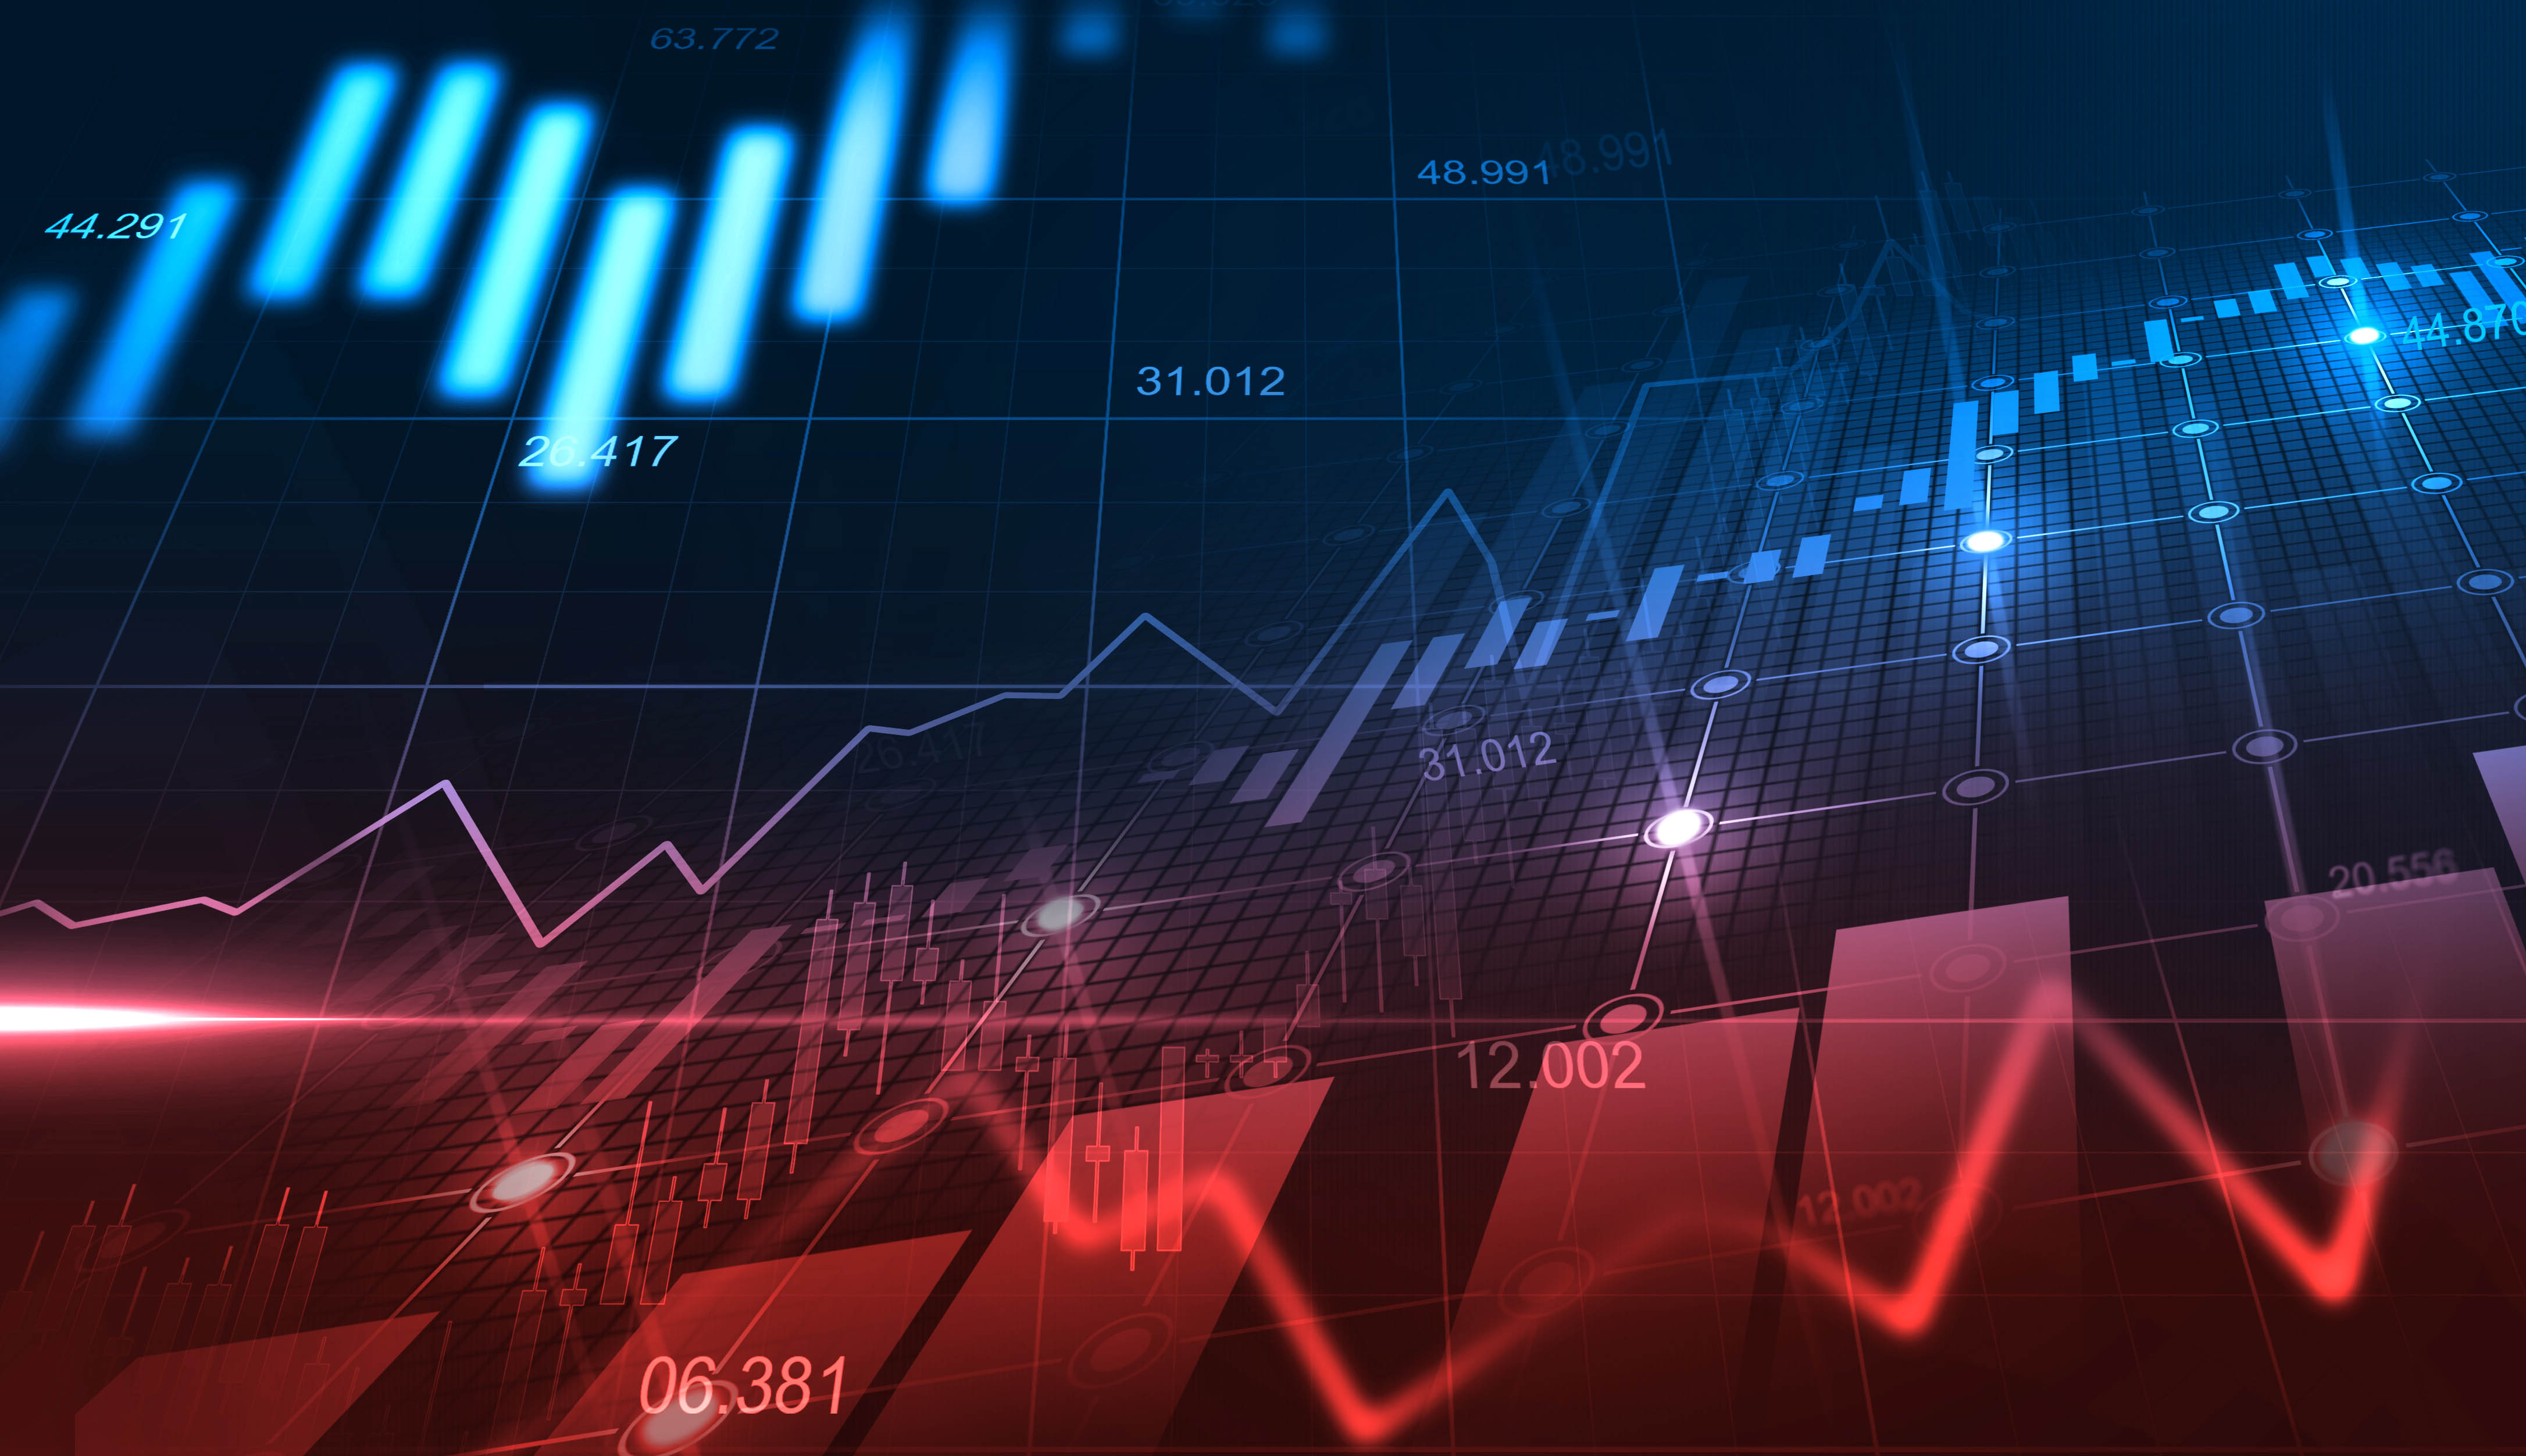















In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
# Lendo os dados
Base_Dados = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Curso - Python para Análise de Dados/Projetos do Curso/Vase_004 - Magalu - Sem Resolução.xlsx')

# Verificando
Base_Dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [3]:
# Dimensões do DataFrame
Base_Dados.shape

(247, 7)

In [4]:
# Informações do DataFrame
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [5]:
Base_Dados.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [6]:
# Séries Temporais - Colocando a coluna Data como index do DataFrame
Dados = Base_Dados.set_index('Data')
Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


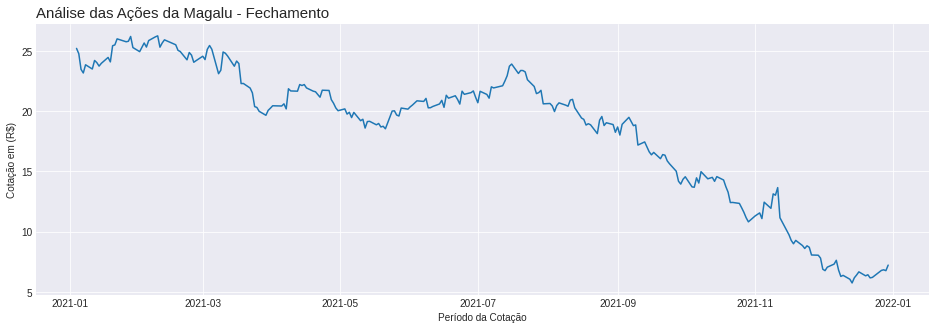

In [7]:
# Visualizando a série temporal 
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das Ações da Magalu - Fechamento', fontsize=15, loc='left')
plt.plot(Dados.index, Dados['Fechamento'])
plt.xlabel('Período da Cotação')
plt.ylabel('Cotação em (R$)');

In [8]:
# Adicionando linha de média movel e tendência no gráfico de série temporal
media_movel = Dados['Fechamento'].rolling(5).mean()
media_tendencia = Dados['Fechamento'].rolling(30).mean()

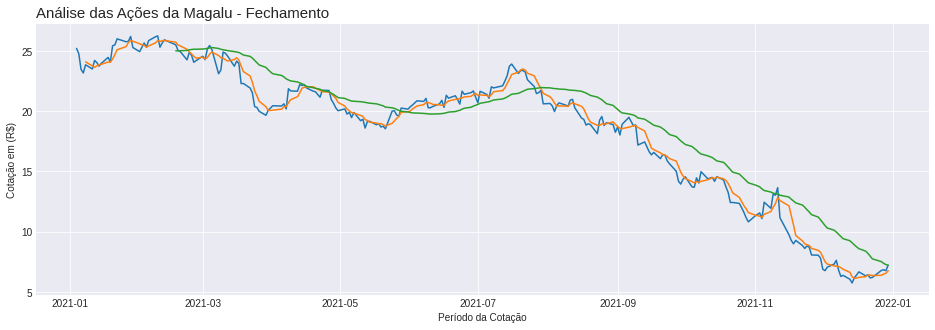

In [9]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise das Ações da Magalu - Fechamento', fontsize=15, loc='left')
plt.plot(Dados.index, Dados['Fechamento'])
plt.plot(Dados.index, media_movel)
plt.plot(Dados.index, media_tendencia)
plt.xlabel('Período da Cotação')
plt.ylabel('Cotação em (R$)');

In [10]:
# Criando um boxplot mensal das cotações 
Base_Dados['Mês'] = Base_Dados['Data'].dt.month

In [11]:
Base_Dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close,Mês
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740,1
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058,1
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999,1
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217,1
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723,1


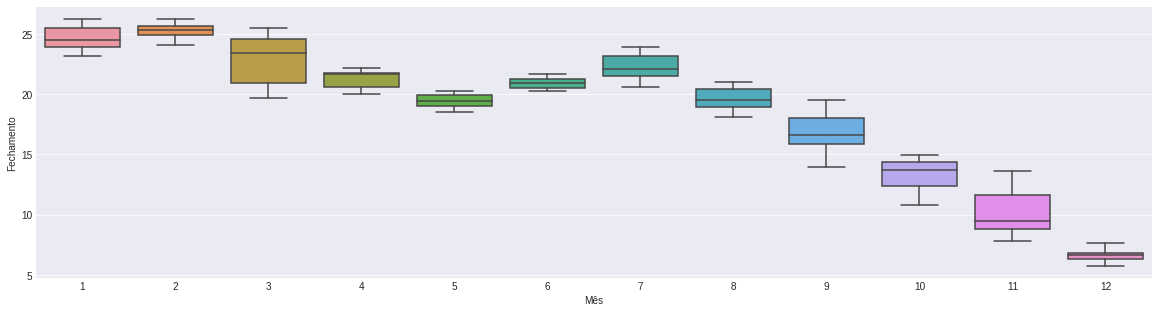

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot( data=Base_Dados, x='Mês', y='Fechamento');

In [13]:
# Criando um gráfico de candlestick 
grafico = go.Figure(
    data=[
          go.Candlestick(
              x=Base_Dados.index,
              open= Dados['Abertura'],
              high= Dados['Maior'],
              low= Dados['Menor'],
              close= Dados['Fechamento'],
          )
    ]
)
grafico.update_layout(xaxis_rangeslider_visible=False)
grafico.show()